## EOS price prediction
### Data
Prices are stored in csv file containing unix timestamp and price in USD. Data come from coinmarketcap.com

In [1]:
import pandas as pd

eos_data = pd.read_csv('eos_price.csv')

display(eos_data.head())

,timestamp,price
0,1506384000,0.561128
1,1506297600,0.570774
2,1506211200,0.546274
3,1506124800,0.576697
4,1506038400,0.569846


### Spliting data

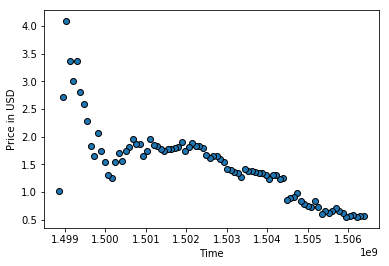

In [14]:
ts = eos_data['timestamp'].values.reshape(-1, 1)
price = eos_data['price']

tsf = pd.Series(range(1513641600, 1506517200, -86400)).append(eos_data['timestamp']).values.reshape(-1, 1)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(ts, price, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Time')
ax.set_ylabel('Price in USD')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

pred = LinearRegression()
pred.fit(ts, price)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 2.45524827 -1.31096439]


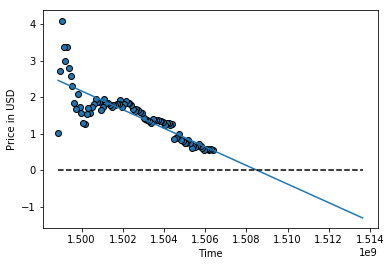

In [4]:
t0 = 1498867200
t1 = 1513641600 # 19.12.2017 - half of ico

pred_price = pred.predict([[t0],[t1]])

print pred_price

fig, ax = plt.subplots()
ax.scatter(ts, price, edgecolors=(0, 0, 0))
ax.plot([t0, t1], pred_price)
ax.plot([t0, t1], [0,0], 'k--')
ax.set_xlabel('Time')
ax.set_ylabel('Price in USD')
plt.show()


### SVR model
I did something wrong here. Have to comback to this later when I will know more about SVR

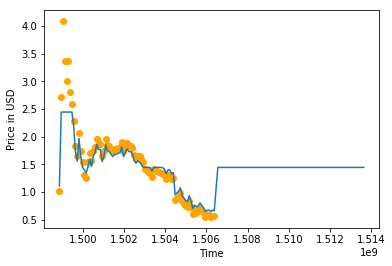

In [15]:
from sklearn.svm import SVR

price_pred1 = SVR().fit(ts, price).predict(tsf)
# Something is wrong - no result
#price_pred2 = SVR(kernel='poly', C=1e3, degree=2).fit(ts, price).predict(tsf)

fig, ax = plt.subplots()
ax.scatter(ts, price, color='orange')
ax.plot(tsf, price_pred1)
# ax.plot(tsf, price_pred2)
ax.set_xlabel('Time')
ax.set_ylabel('Price in USD')
plt.show()